In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv("ps6_trainvalid.csv")
test_df = pd.read_csv("ps6_test.csv")

df = df.drop([0])

In [3]:
test_df = test_df.drop(['humidity', 'pressure', 'weather', 'wind_direction', 'wind_speed'], axis=1)

In [4]:
df = df.drop(['humidity', 'pressure', 'weather', 'wind_direction', 'wind_speed'], axis=1)

In [5]:
test_df

,datetime,temperature
0,2017-11-20 01:00:00,295.72
1,2017-11-20 02:00:00,292.97
2,2017-11-20 03:00:00,290.71
3,2017-11-20 04:00:00,290.09
4,2017-11-20 05:00:00,289.03
...,...,...
235,2017-11-29 20:00:00,293.55
236,2017-11-29 21:00:00,295.68
237,2017-11-29 22:00:00,295.96
238,2017-11-29 23:00:00,295.65


In [6]:
df

,datetime,temperature
1,2012-10-01 13:00:00,291.870000
2,2012-10-01 14:00:00,291.868186
3,2012-10-01 15:00:00,291.862844
4,2012-10-01 16:00:00,291.857503
5,2012-10-01 17:00:00,291.852162
...,...,...
45008,2017-11-19 20:00:00,295.440000
45009,2017-11-19 21:00:00,296.020000
45010,2017-11-19 22:00:00,296.510000
45011,2017-11-19 23:00:00,297.090000


In [7]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

                 datetime  temperature
3859  2013-03-11 07:00:00          NaN
3860  2013-03-11 08:00:00          NaN


In [8]:
df.isna().sum()

datetime       0
temperature    2
dtype: int64

In [9]:
df['temperature'] = df['temperature'].interpolate(method='linear')

In [10]:
df

,datetime,temperature
1,2012-10-01 13:00:00,291.870000
2,2012-10-01 14:00:00,291.868186
3,2012-10-01 15:00:00,291.862844
4,2012-10-01 16:00:00,291.857503
5,2012-10-01 17:00:00,291.852162
...,...,...
45008,2017-11-19 20:00:00,295.440000
45009,2017-11-19 21:00:00,296.020000
45010,2017-11-19 22:00:00,296.510000
45011,2017-11-19 23:00:00,297.090000


In [11]:
df.isna().sum()

datetime       0
temperature    0
dtype: int64

In [12]:
date_time = pd.to_datetime(df.pop('datetime'))
date_time

1       2012-10-01 13:00:00
2       2012-10-01 14:00:00
3       2012-10-01 15:00:00
4       2012-10-01 16:00:00
5       2012-10-01 17:00:00
                ...        
45008   2017-11-19 20:00:00
45009   2017-11-19 21:00:00
45010   2017-11-19 22:00:00
45011   2017-11-19 23:00:00
45012   2017-11-20 00:00:00
Name: datetime, Length: 45012, dtype: datetime64[ns]

In [13]:
date_time_test = pd.to_datetime(test_df.pop('datetime'))
date_time_test

0     2017-11-20 01:00:00
1     2017-11-20 02:00:00
2     2017-11-20 03:00:00
3     2017-11-20 04:00:00
4     2017-11-20 05:00:00
              ...        
235   2017-11-29 20:00:00
236   2017-11-29 21:00:00
237   2017-11-29 22:00:00
238   2017-11-29 23:00:00
239   2017-11-30 00:00:00
Name: datetime, Length: 240, dtype: datetime64[ns]

In [14]:
df

,temperature
1,291.870000
2,291.868186
3,291.862844
4,291.857503
5,291.852162
...,...
45008,295.440000
45009,296.020000
45010,296.510000
45011,297.090000


In [15]:
test_df

,temperature
0,295.72
1,292.97
2,290.71
3,290.09
4,289.03
...,...
235,293.55
236,295.68
237,295.96
238,295.65


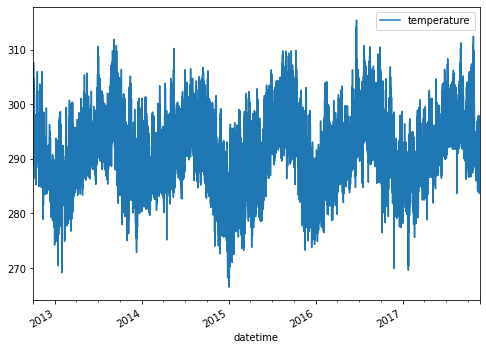

In [16]:
plot_cols = ['temperature'] #, 'humidity', 'pressure', 'wind_direction', 'wind_speed']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

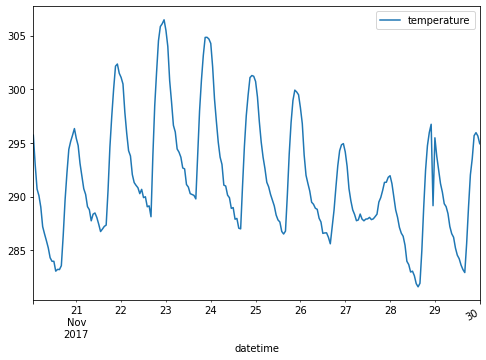

In [17]:
plot_cols = ['temperature'] #, 'humidity', 'pressure', 'wind_direction', 'wind_speed']
plot_features = test_df[plot_cols]
plot_features.index = date_time_test
_ = plot_features.plot(subplots=True)

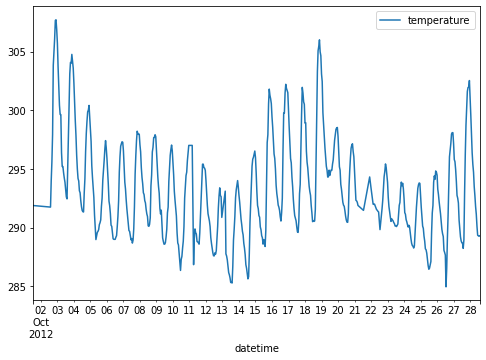

In [18]:
plot_features = df[plot_cols][:650]
plot_features.index = date_time[:650]
_ = plot_features.plot(subplots=True)

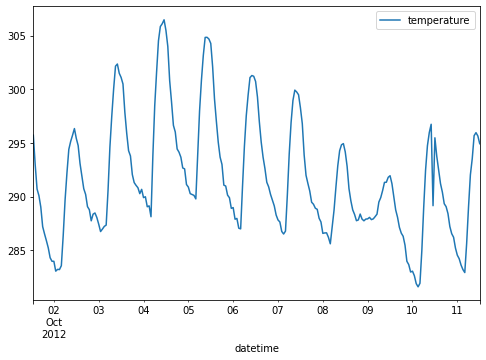

In [19]:
plot_features = test_df[plot_cols][:240]
plot_features.index = date_time[:240]
_ = plot_features.plot(subplots=True)

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,45012.0,290.841207,6.465209,266.503667,286.37,290.53,295.08,315.47


In [21]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,240.0,291.702988,5.535212,281.6,287.9075,290.57,294.9325,306.47


In [22]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [23]:
timestamp_s_test = date_time_test.map(datetime.datetime.timestamp)

In [24]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [25]:
test_df['Day sin'] = np.sin(timestamp_s_test * (2 * np.pi / day))
test_df['Day cos'] = np.cos(timestamp_s_test * (2 * np.pi / day))
test_df['Year sin'] = np.sin(timestamp_s_test * (2 * np.pi / year))
test_df['Year cos'] = np.cos(timestamp_s_test * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

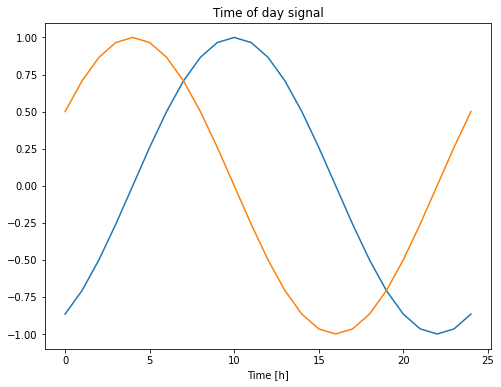

In [26]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of day signal')

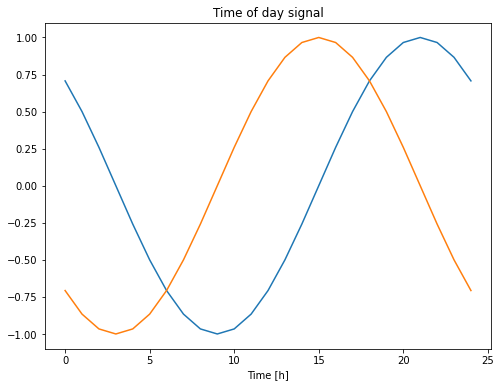

In [27]:
plt.plot(np.array(test_df['Day sin'])[:25])
plt.plot(np.array(test_df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

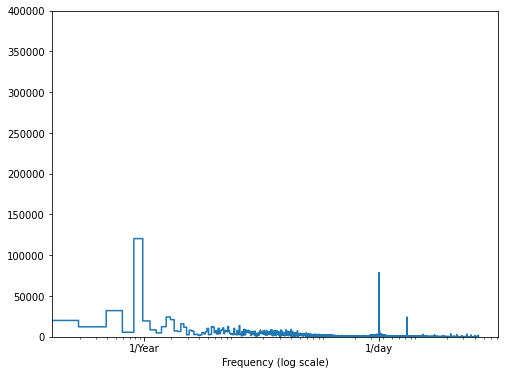

In [28]:
fft = tf.signal.rfft(df['temperature'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

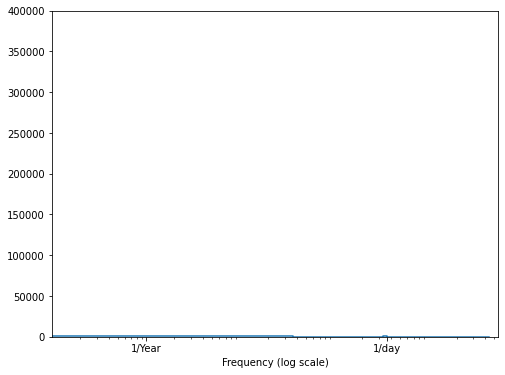

In [29]:
fft_test = tf.signal.rfft(test_df['temperature'])
f_per_dataset_test = np.arange(0, len(fft_test))

n_samples_h_test = len(test_df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset_test = n_samples_h_test/(hours_per_year)

f_per_year_test = f_per_dataset_test/years_per_dataset_test
plt.step(f_per_year_test, np.abs(fft_test))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [30]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):]

num_features = df.shape[1]
num_features_test = test_df.shape

In [31]:
num_features

5

In [32]:
num_features_test

(240, 5)

In [33]:
df

,temperature,Day sin,Day cos,Year sin,Year cos
1,291.870000,-8.660254e-01,5.000000e-01,-0.999924,0.012325
2,291.868186,-7.071068e-01,7.071068e-01,-0.999915,0.013041
3,291.862844,-5.000000e-01,8.660254e-01,-0.999905,0.013758
4,291.857503,-2.588190e-01,9.659258e-01,-0.999895,0.014475
5,291.852162,-6.304366e-12,1.000000e+00,-0.999885,0.015192
...,...,...,...,...,...
45008,295.440000,8.660254e-01,5.000000e-01,-0.654451,0.756104
45009,296.020000,9.659258e-01,2.588190e-01,-0.653909,0.756573
45010,296.510000,1.000000e+00,1.086883e-11,-0.653367,0.757042
45011,297.090000,9.659258e-01,-2.588190e-01,-0.652824,0.757510


In [34]:
test_df

,temperature,Day sin,Day cos,Year sin,Year cos
0,295.72,7.071068e-01,-7.071068e-01,-0.651737,0.758445
1,292.97,5.000000e-01,-8.660254e-01,-0.651193,0.758912
2,290.71,2.588190e-01,-9.659258e-01,-0.650649,0.759378
3,290.09,-1.119741e-12,-1.000000e+00,-0.650105,0.759845
4,289.03,-2.588190e-01,-9.659258e-01,-0.649560,0.760310
...,...,...,...,...,...
235,293.55,8.660254e-01,5.000000e-01,-0.515361,0.856973
236,295.68,9.659258e-01,2.588190e-01,-0.514747,0.857342
237,295.96,1.000000e+00,1.153919e-11,-0.514132,0.857711
238,295.65,9.659258e-01,-2.588190e-01,-0.513517,0.858079


In [35]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [36]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

In [37]:
df_std

,Column,Normalized
0,temperature,0.266284
1,temperature,0.266003
2,temperature,0.265177
3,temperature,0.264351
4,temperature,0.263524
...,...,...
225055,Year cos,0.971474
225056,Year cos,0.972149
225057,Year cos,0.972822
225058,Year cos,0.973496


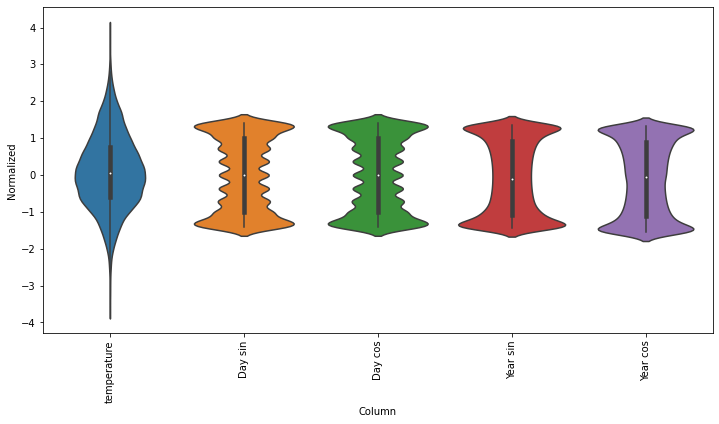

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing

### 1. Indexes and offsets

In [39]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [40]:
# w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
#                      label_columns=['temperature'])
# w1

In [41]:
w2 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['temperature'])
w2

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['temperature']

### 2. Split

In [42]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [43]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 5)
Inputs shape: (3, 24, 5)
labels shape: (3, 1, 1)


### 3. Plot

In [44]:
w2.example = example_inputs, example_labels

In [45]:
def plot(self, model=None, plot_col='temperature', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)
            
        if n == 0:
            plt.legend()
    
    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

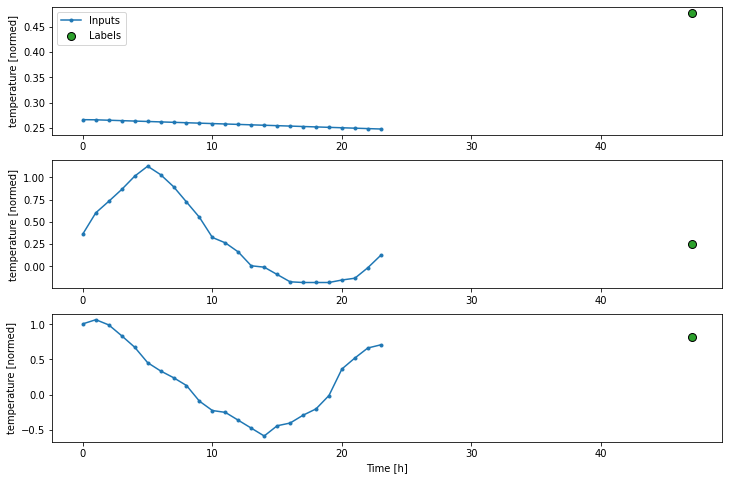

In [46]:
w2.plot()

### 4. Create `tf.data.Dataset`s

In [47]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [48]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [49]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 24, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [50]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 5)
Labels shape (batch, time, features): (32, 1, 1)


## Multi-step models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['temperature']

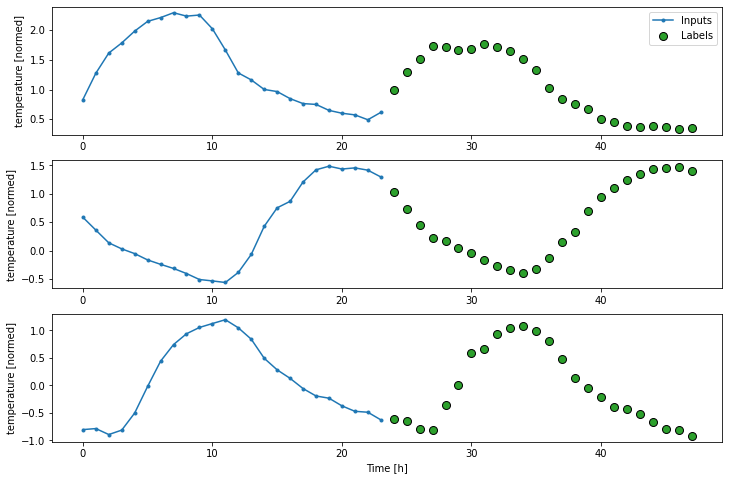

In [51]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              label_columns=['temperature'])

multi_window.plot()
multi_window

### Baselines

421/421 [==============================] - 1s 2ms/step - loss: 2.1992 - mean_absolute_error: 1.1991


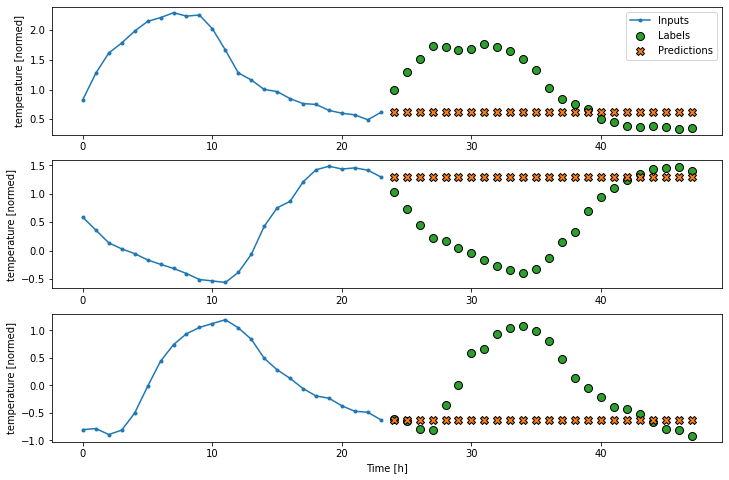

In [52]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

421/421 [==============================] - 1s 3ms/step - loss: 1.8456 - mean_absolute_error: 1.0475


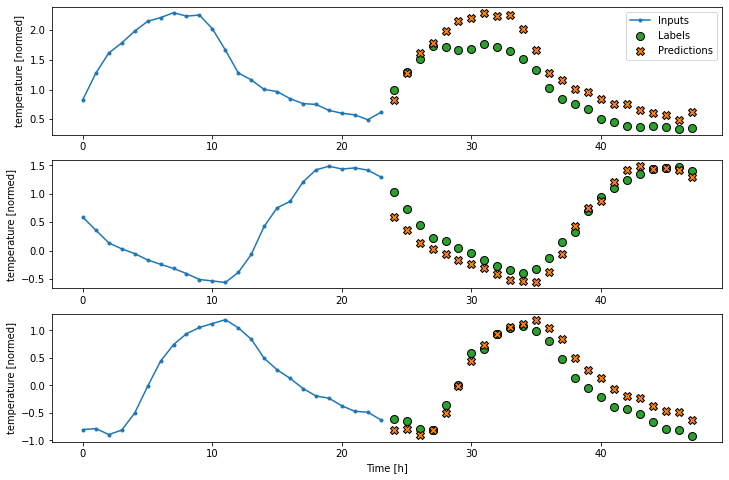

In [53]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

#### Linear

In [54]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

421/421 [==============================] - 1s 3ms/step - loss: 0.1904 - mean_absolute_error: 0.3270A: 0s - loss: 0.1898 - mean_absolute_error: 0.3


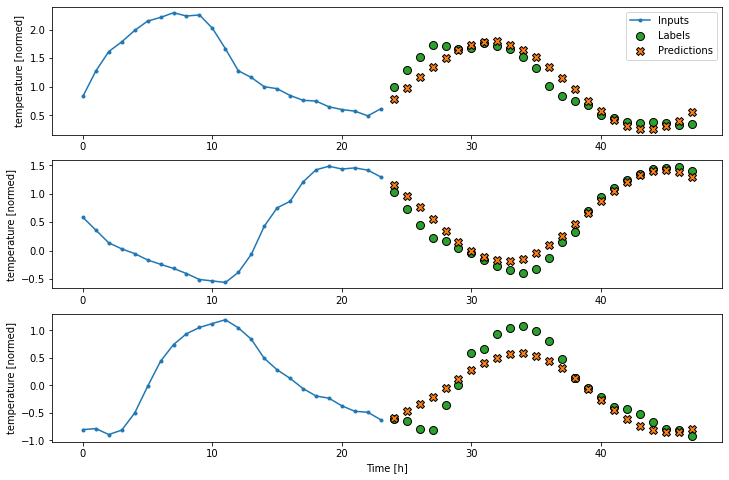

In [55]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Dense

421/421 [==============================] - 1s 3ms/step - loss: 0.1498 - mean_absolute_error: 0.2857


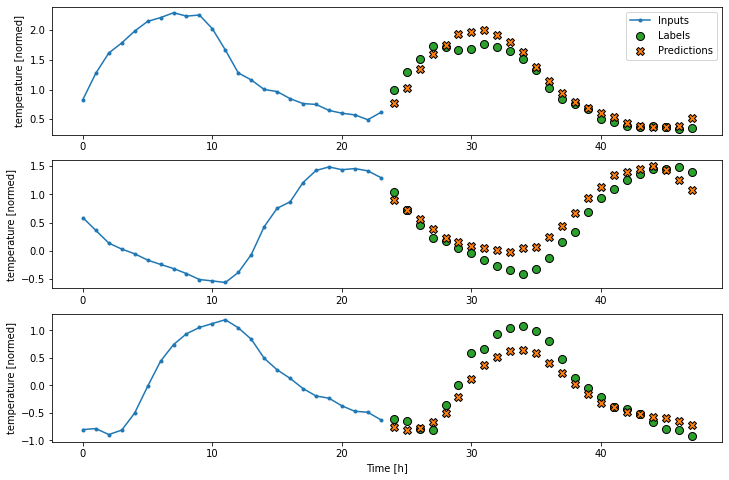

In [56]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### CNN

421/421 [==============================] - 1s 3ms/step - loss: 0.1429 - mean_absolute_error: 0.2804


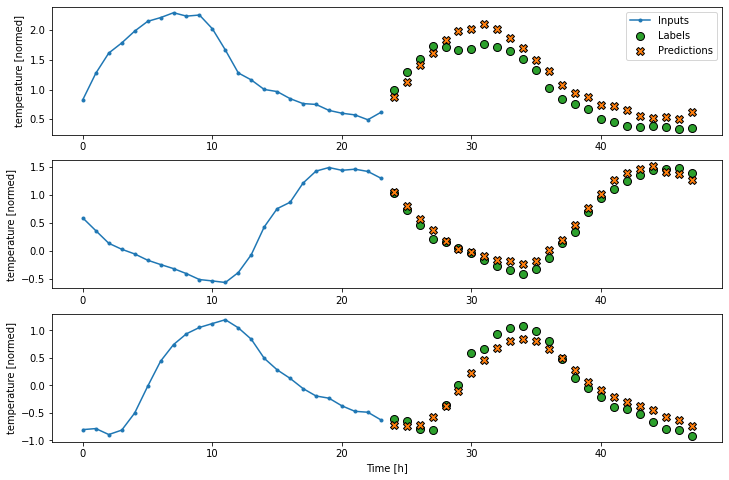

In [57]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### RNN

421/421 [==============================] - 2s 4ms/step - loss: 0.1065 - mean_absolute_error: 0.2369


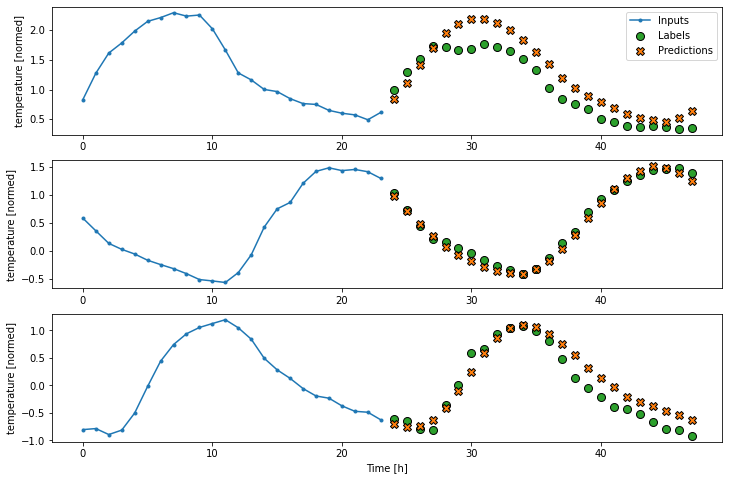

In [58]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

#### RNN

In [59]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [60]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [61]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [62]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 5])

In [63]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [64]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 5)


421/421 [==============================] - 2s 5ms/step - loss: 0.1129 - mean_absolute_error: 0.2494


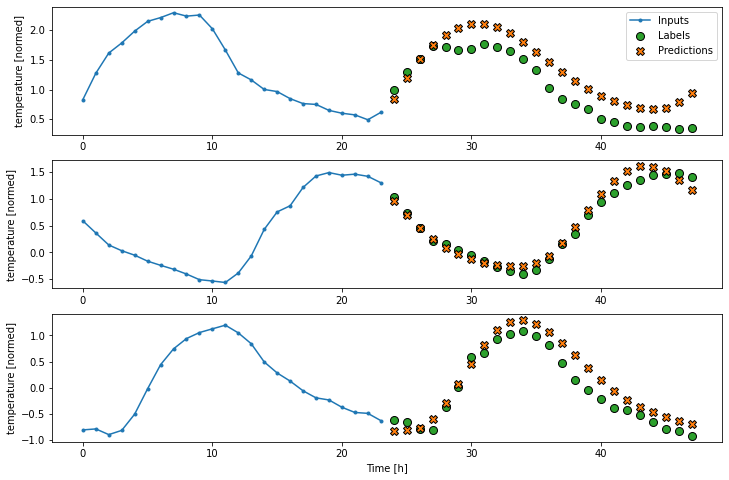

In [65]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Performance

In [66]:
multi_performance

{'Last': [1.6729803085327148, 1.0622844696044922],
 'Repeat': [1.328882098197937, 0.9221139550209045],
 'Linear': [0.3530655801296234, 0.4742218255996704],
 'Dense': [0.2658698558807373, 0.3947722017765045],
 'Conv': [0.24983736872673035, 0.39615586400032043],
 'LSTM': [0.16879980266094208, 0.32753029465675354],
 'AR LSTM': [0.1599181890487671, 0.3163120746612549]}

In [67]:
multi_val_performance

{'Last': [2.1943235397338867, 1.1971851587295532],
 'Repeat': [1.833377718925476, 1.044592022895813],
 'Linear': [0.1903611272573471, 0.32702839374542236],
 'Dense': [0.14979371428489685, 0.28565043210983276],
 'Conv': [0.14292609691619873, 0.28044742345809937],
 'LSTM': [0.10652067512273788, 0.2369038611650467],
 'AR LSTM': [0.11294548213481903, 0.24943751096725464]}

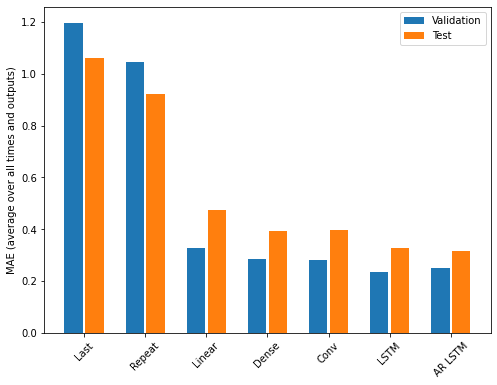

In [68]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [69]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 1.0623
Repeat  : 0.9221
Linear  : 0.4742
Dense   : 0.3948
Conv    : 0.3962
LSTM    : 0.3275
AR LSTM : 0.3163


The gains achieved going from a dense model to convolutional and recurrent models are only a few percent (if any), and the autoregressive model performed clearly worse. So these more complex approaches may not be worth while on **this** problem, but there was no way to know without trying, and these models could be helpful for **your** problem.